# HW1  Try out gradient descent

## Due Thursday Feb 3rd, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problems that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

In [1]:
# Imports
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Enable chaging the style of text
from IPython.display import Markdown

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

$\color{red}{\frac{\partial}{\partial w}g(w) = \frac{1}{50}(4w^3 + 2w + 10)}$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [2]:
# Gradient descent function
# Inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha, max_its, w0):
    
    # Set the weight to the initial value
    wk = w0
    
    # Calculates the derivative for the above function given any w
    def differentiate(w):
        return (w**3*4 + 2*w + 10) / 50
    
    # Will hold the cost after each iteration
    cost_history = [(wk**4 + wk**2 + 10*wk - 50) / 50]
    
    # Calculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - alpha*differentiate(wk)
        cost_history.append((wk**4 + wk**2 + 10*wk - 50) / 50)
    
    return cost_history

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


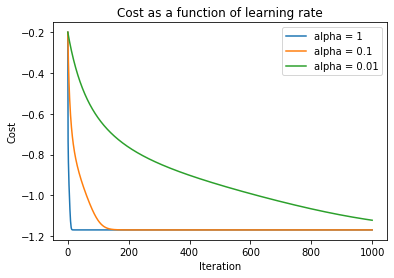

In [3]:
# Run gradient descent
first_run = gradient_descent(alpha=1, max_its=1000, w0=2.0)
second_run = gradient_descent(alpha=0.1, max_its=1000, w0=2.0)
third_run = gradient_descent(alpha=0.01, max_its=1000, w0=2.0)

plot1, ax = plt.subplots()

# Plot all three curves
for run in [first_run, second_run, third_run]:
    ax.plot(run)
    
# Make the plot more informative
ax.set_title("Cost as a function of learning rate")
ax.legend(["alpha = 1", "alpha = 0.1", "alpha = 0.01"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

$\color{red}{\text{This is a convex function because a line segment drawn between any two points on the graph of this function will not fall below the graph.}}$
$\color{red}{\text{However, its global minimum is at 0, which is the only point that is not differentiable.}}$

5) [5 points] What is the derivative of the cost function? 

$\color{red}{
\begin{equation}
g'(w) = \frac{w}{\left \vert w \right \vert} \;\;\;if\: w\neq0
\end{equation}}$

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost function g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [4]:
# Gradient descent function
# Inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    
    # Set the weight to the initial value
    wk = w0
    
    # Calculates the gradient for the above function given any w
    gradient = grad(g)
    
    # Will hold the costs and weights after each iteration
    cost_history = [g(wk)]
    weight_history = [w0]
    
    # Claculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - alpha*gradient(wk)
        cost_history.append(g(wk))
        weight_history.append(wk)
        
    return weight_history, cost_history

7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

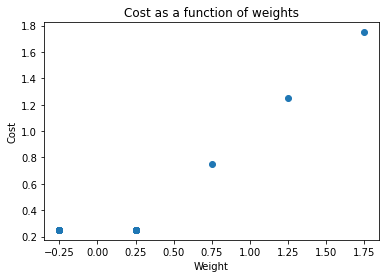

In [12]:
fourth_run = gradient_descent(g=lambda x: np.abs(x), alpha=0.5, max_its=20, w0=1.75)

plt.scatter(fourth_run[0], fourth_run[1])

# Make the plot look decent
plt.title("Cost as a function of weights")
plt.xlabel("Weight")
plt.ylabel("Cost")

plt.show()

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [6]:
# Gradient descent function
# Inputs: g (cost function), max_its (maximum number of iterations), w (initialization)
def adaptive_gradient_descent(g, max_its, w0):
    
    # Set the weight to the initial value
    wk = w0
    
    # Calculates the gradient for the above function given any w
    gradient = grad(g)
    
    # Will hold the costs and weights after each iteration
    cost_history = [g(wk)]
    weight_history = [w0]
    
    # Calculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - (1 / (iter + 1))*gradient(wk)
        cost_history.append(g(wk))
        weight_history.append(wk)
        
    return weight_history, cost_history

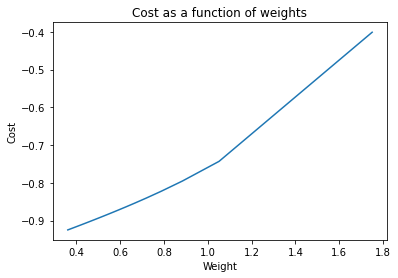

In [7]:
# Test the function
fifth_run = adaptive_gradient_descent(g=lambda x: (x**4 + x**2 + 10*x - 50) / 50, max_its=20, w0=1.75)

plt.plot(fifth_run[0], fifth_run[1])

# Make the plot look decent
plt.title("Cost as a function of weights")
plt.xlabel("Weight")
plt.ylabel("Cost")

plt.show()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why?

$\color{red}{\text{As the graph below shows, using a fixed learning rate works better for this application than using a learning rate that is the reciprocal of each}}$
$\color{red}{\text{iteration. This is because at each iteration with an adaptive learning rate, the learning rate moves towards zero and eventually there is almost }}$
$\color{red}{\text{no movement down the gradient.}}$

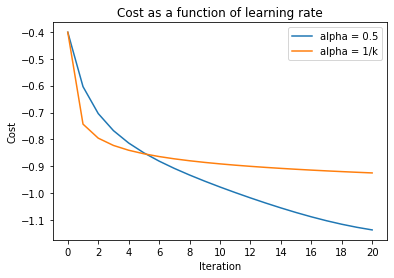

In [8]:
plot2, ax = plt.subplots()

# Plot all three curves
for run in [fourth_run, fifth_run]:
    ax.plot(run[1])
    
# Make the plot more informative
ax.set_title("Cost as a function of learning rate")
ax.legend(["alpha = 0.5", "alpha = 1/k"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")
ax.set_xticks(np.arange(0, 21, 2))

plt.show()

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [9]:
# Cost function
def toy_function(weights):
    return weights[0]**2 + weights[1]**2 + 2*np.sin(1.5*(weights[0] + weights[1])) + 2

# Gradient descent function
# Inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    
    # Set the weight to the initial value
    wk = w0
    
    # Calculates the gradient for the above function given any w
    gradient = grad(g)
    
    # Will hold the costs and weights after each iteration
    cost_history = [g(wk)]
    weight_history = [w0]
    
    # Claculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - alpha*gradient(wk)
        cost_history.append(g(wk))
        weight_history.append(wk)
        
    return weight_history, cost_history

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$\color{red}{\text{As the graph below shows, when alpha is set to one, the cost oscillates wildly because it overshoots the minimum.}}$

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1

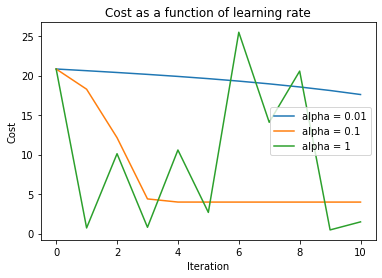

In [10]:
# Run gradient descent
sixth_run = gradient_descent(toy_function, 0.01, 10, np.array([3.0, 3.0]))
seventh_run = gradient_descent(toy_function, 0.1, 10, np.array([3.0, 3.0]))
eigth_run = gradient_descent(toy_function, 1, 10, np.array([3.0, 3.0]))

# Plot cost as a function of step number
plot3, ax = plt.subplots()

# Plot all three curves
for run in [sixth_run, seventh_run, eigth_run]:
    ax.plot(run[1])
    
# Make the plot more informative
ax.set_title("Cost as a function of learning rate")
ax.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

$\color{red}{\text{As the plot below shows, gradient descent converges fastest when alpha is set to 0.05.}}$

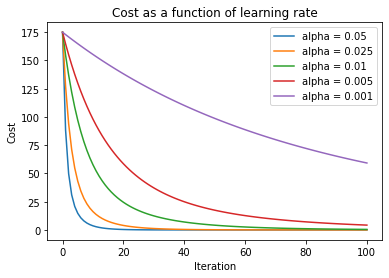

In [11]:
def final_function(parameters):
    return 2*parameters[0]**2 + parameters[1]**2 + 4*parameters[2]**2

ninth_run = gradient_descent(final_function, 0.05, 100, np.array([5.0, 5.0, 5.0]))
tenth_run = gradient_descent(final_function, 0.025, 100, np.array([5.0, 5.0, 5.0]))
eleventh_run = gradient_descent(final_function, 0.01, 100, np.array([5.0, 5.0, 5.0]))
twelfth_run = gradient_descent(final_function, 0.005, 100, np.array([5.0, 5.0, 5.0]))
thirteenth_run = gradient_descent(final_function, 0.001, 100, np.array([5.0, 5.0, 5.0]))

# Plot cost as a function of step number
plot3, ax = plt.subplots()

# Plot all three curves
for run in [ninth_run, tenth_run, eleventh_run, twelfth_run, thirteenth_run]:
    ax.plot(run[1])
    
# Make the plot more informative
ax.set_title("Cost as a function of learning rate")
ax.legend(["alpha = 0.05", "alpha = 0.025", "alpha = 0.01", "alpha = 0.005", "alpha = 0.001"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()